In [50]:
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin

In [81]:
def plot_trading_strategy(stock):
    ma_1 = 30
    ma_2 = 100
    start_date = str(dt.datetime.now() - dt.timedelta(days=365 * 3))[:9]
    end_date = str(dt.datetime.now())[:9]

    yfin.pdr_override()
    data = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
    #print(data)

    data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
    data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()

    plt.style.use("dark_background")
    # plt.plot(data['Adj Close'], label="Share Price",color="lightgray")
    # plt.plot(data[f'SMA_{ma_1}'],label=f"SMA_{ma_1}",color="orange")
    # plt.plot(data[f'SMA_{ma_2}'],label=f"SMA_{ma_2}",color="purple")
    # plt.legend(loc="upper left")
    # plt.show()

    buy_stock_signals = []
    sell_stock_signals = []
    trigger = 0

    for x in range(len(data)):
        if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
            buy_stock_signals.append(data['Adj Close'].iloc[x])
            sell_stock_signals.append(float('nan'))
            trigger = 1
        elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
            sell_stock_signals.append(data['Adj Close'].iloc[x])
            buy_stock_signals.append(float('nan'))
            trigger = -1
        else:
            buy_stock_signals.append(float('nan'))
            sell_stock_signals.append(float('nan'))    

    data['Buy Signals'] = buy_stock_signals
    data['Sell Signals'] = sell_stock_signals
    #print(data)

    plt.plot(data['Adj Close'], label="Share Price",alpha=0.5)
    plt.plot(data[f'SMA_{ma_1}'],label=f"SMA_{ma_1}",color="orange", linestyle="--")
    plt.plot(data[f'SMA_{ma_2}'],label=f"SMA_{ma_2}",color="pink", linestyle="--")
    plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw=3)
    plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw=3)
    plt.legend(loc="upper left")
    plt.title(stock)
    plt.show()


    


[*********************100%%**********************]  1 of 1 completed


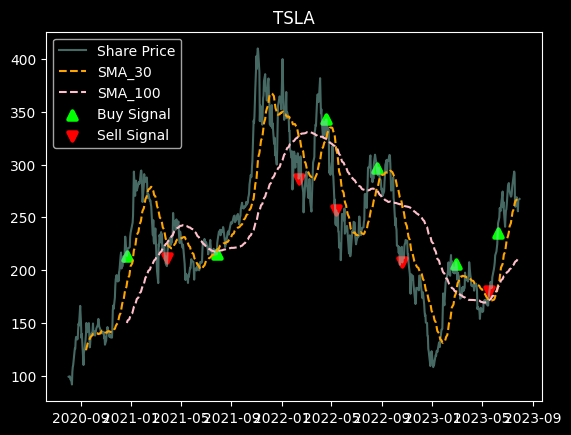

In [82]:
plot_trading_strategy('TSLA')

[*********************100%%**********************]  1 of 1 completed


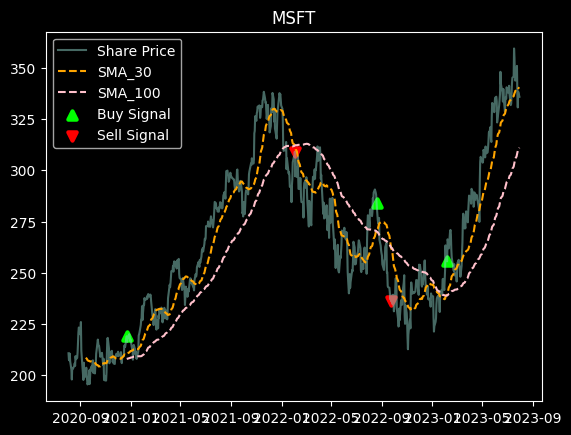

In [84]:
plot_trading_strategy('MSFT')

[*********************100%%**********************]  1 of 1 completed


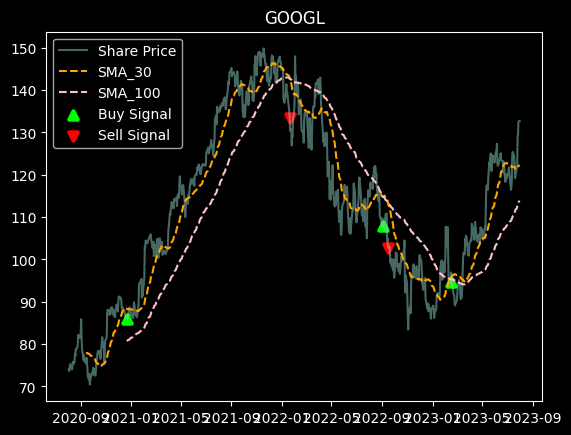

In [85]:
plot_trading_strategy('GOOGL')